In [2]:
import os
import glob
import re
import numpy as np
import numpy.fft as fft
import mne
import matplotlib.pyplot as plt
from scipy import stats, signal
from numpy import save, load

In [9]:
def time_differential(x_series):
    a=[]
    for ch in x_series:
        c=np.zeros_like(ch)
        for i in range (1,len(ch)):
            c[i]=ch[i]-ch[i-1]
        a.append(c)
    return np.array(a)

    

In [10]:
file = 'physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf'
raw = mne.io.read_raw_edf(file)
file_seizure = 'physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf'
raw_seizure = mne.io.read_raw_edf(file_seizure)

Extracting EDF parameters from d:\salma\UNI\Sem8\WS\physionet.org\files\chbmit\1.0.0\chb01\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from d:\salma\UNI\Sem8\WS\physionet.org\files\chbmit\1.0.0\chb01\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<ipython-input-10-06cbf20b96b4>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file)
<ipython-input-10-06cbf20b96b4>:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(file)
<ipython-input-10-06cbf20b96b4>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_seizure = mne.io.read_raw_edf(file_s

In [11]:
rawdata = raw.get_data().astype(np.float32) * 1e6
rawdata_seizure=raw_seizure.get_data().astype(np.float32) * 1e6

In [12]:
# start_time=2996 #ictal
start_time=2816 #preictal

In [13]:
window=time_differential(rawdata[:,:5120])
window_seizure=time_differential(rawdata_seizure[:,start_time*256:start_time*256+5120])

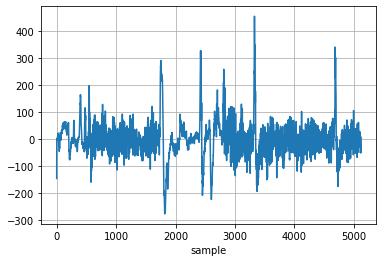

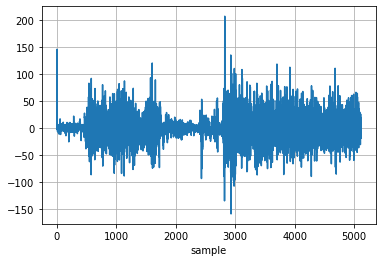

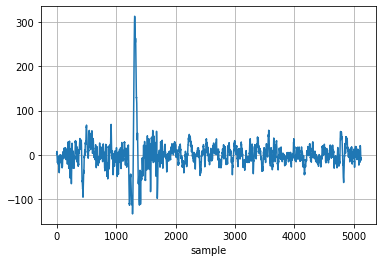

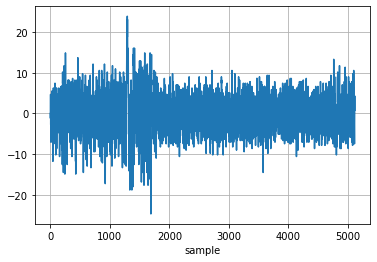

In [14]:
times=np.arange(5120)
plt.plot(times, rawdata[0,:5120])
plt.xlabel('sample')
plt.grid()
plt.show()
plt.plot(times, window[0])
plt.xlabel('sample')
plt.grid()
plt.show()
times=np.arange(5120)
plt.plot(times, rawdata_seizure[0,start_time*256:start_time*256+5120])
plt.xlabel('sample')
plt.grid()
plt.show()
plt.plot(times, window_seizure[0])
plt.xlabel('sample')
plt.grid()
plt.show()

In [15]:
freqs1, psd1 = signal.welch(rawdata[:,:5120], fs=256)
freqs2, psd2 = signal.welch(window, fs=256)
freqs3, psd3 = signal.welch(rawdata_seizure[:,start_time*256:start_time*256+5120], fs=256)
freqs4, psd4 = signal.welch(window_seizure, fs=256)


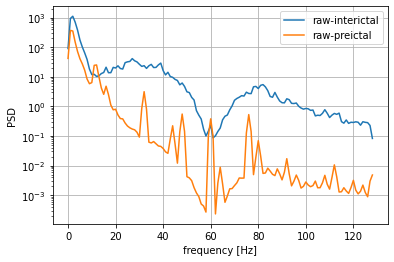

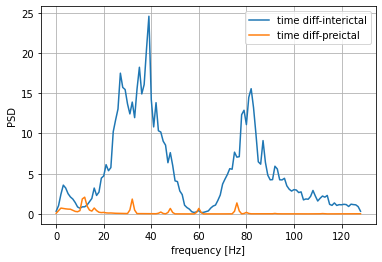

In [16]:
# ax1, ax2=plt.axes()
channel=0
plt.figure()
plt.semilogy(freqs1, psd1[channel], label = "raw-interictal")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.semilogy(freqs3, psd3[channel], label = "raw-preictal")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.legend()
plt.show()

plt.plot(freqs2, psd2[channel],label = "time diff-interictal")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')

plt.plot(freqs4, psd4[channel], label = "time diff-preictal")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.legend()
plt.show()